In [1]:
#AVEC spin orbit

import matplotlib.pyplot as plt
import numpy as np


def CalcAvecSpin(n1 = 60,n2 = 60,t = 1,t_2 = 0.05*1j):

    Hanalytique = np.zeros((2*n1*n2 ,2*n1*n2),dtype = 'complex')

    Htemp = np.zeros((2,2), dtype = 'complex')

    delta = np.array([[0.5,np.sqrt(3)*0.5],[0.5,-np.sqrt(3)*0.5],[-1,0]])

    latticevect=(2.0*np.pi/3)*np.array([[1,np.sqrt(3)],[1,-np.sqrt(3)]])



    pos = 0

    for i in range(0,n1):
    
        for j in range(0,n2):
    
            kvect = (i/(n1*1.0))*latticevect[0,:] + (j/(n2*1.0))*latticevect[1,:]    
        
            deltak1 = np.dot(delta[0,:],kvect)
        
            deltak2 = np.dot(delta[1,:],kvect)
        
            deltak3 = np.dot(delta[2,:],kvect)
        
            deltaSOC1 = + (deltak1-deltak3)
            deltaSOC2 = + (deltak1-deltak2)
            deltaSOC3 = + (deltak3-deltak2)
            deltaSOC4 = + (deltak3-deltak1)
            deltaSOC5 = + (deltak2-deltak1)
            deltaSOC6 = + (deltak2-deltak3)
        
            Htemp = np.zeros((2,2), dtype = 'complex')
        
            Htemp[0,1]+=-t*(np.exp(1j*(deltak1)) + np.exp(1j*(deltak2)) +  np.exp(1j*(deltak3)))
        
            Htemp[1,0]+=-t*(np.exp(-1j*(deltak1)) + np.exp(-1j*(deltak2)) +  np.exp(-1j*(deltak3)))

            Htemp[0,0]+=-1*t_2*((-np.exp(1j*(deltaSOC1)) + np.exp(1j*(deltaSOC2)) - np.exp(1j*(deltaSOC3))+ 
            np.exp(1j*(deltaSOC4)) - np.exp(1j*(deltaSOC5))+  np.exp(1j*(deltaSOC6))) - (-np.exp(-1j*(deltaSOC1)) 
            + np.exp(-1j*(deltaSOC2)) - np.exp(-1j*(deltaSOC3))+ 
            np.exp(-1j*(deltaSOC4)) -  np.exp(-1j*(deltaSOC5))+  np.exp(-1j*(deltaSOC6)))) 
        
            Htemp[1,1] +=-1*t_2*((-np.exp(-1j*(deltaSOC1)) + np.exp(-1j*(deltaSOC2)) -  np.exp(-1j*(deltaSOC3))+ 
            np.exp(-1j*(deltaSOC4))-  np.exp(-1j*(deltaSOC5))+  np.exp(-1j*(deltaSOC6)))  - (-np.exp(1j*(deltaSOC1)) 
            + np.exp(1j*(deltaSOC2)) -  np.exp(1j*(deltaSOC3))+ 
            np.exp(1j*(deltaSOC4))-  np.exp(1j*(deltaSOC5))+  np.exp(1j*(deltaSOC6))))
        
    
        
        
            einval,eingvect = np.linalg.eig(Htemp)

            #print(einval)
        
            Hanalytique [pos,pos] += einval[0]
            Hanalytique [pos+1,pos+1] += einval[1]

            pos +=2
    return Hanalytique

/home/lsneto/anaconda3/lib/python2.7/site-packages/numpy/lib/function_base.py:754: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp_a_data = tmp_a.astype(float)
/home/lsneto/anaconda3/lib/python2.7/site-packages/numpy/lib/function_base.py:760: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = tmp_a.astype(np.intp)
/home/lsneto/anaconda3/lib/python2.7/site-packages/numpy/lib/function_base.py:816: ComplexWarning: Casting complex values to real discards the imaginary part
  db = array(np.diff(bins), float)
/home/lsneto/anaconda3/lib/python2.7/site-packages/matplotlib/transforms.py:814: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/home/lsneto/anaconda3/lib/python2.7/site-packages/matplotlib/transforms.py:2041: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


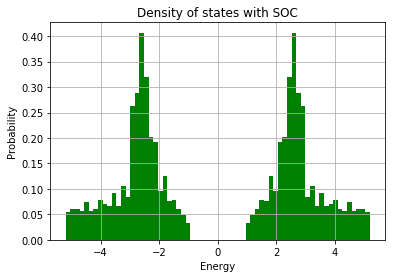

In [2]:

n1 = 66
n2 = n1
t = 1 
t_2 = 0.5*1j


Hanalyt = CalcAvecSpin(n1,n2,t,t_2)

einval = np.diagonal(Hanalyt)

# the histogram of the data : density of states 

nbins = n1

x_Total = einval

plt.figure(1)

n_, bins_, patches_ = plt.hist(x_Total, nbins , normed=1, facecolor='green')

plt.ylabel('Probability')
plt.title('Density of states with SOC')
plt.xlabel('Energy')
plt.grid(True)
plt.savefig('DOS_SOC.pdf')

plt.show()

        
#print(np.diagonal(Hanalytique))

#print(np.size(Hanalytique))

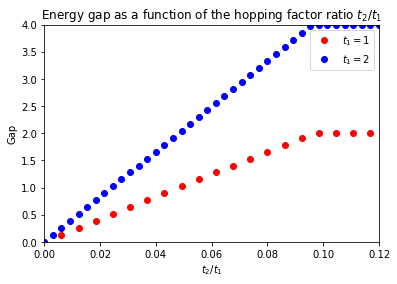

In [6]:

npoints = 40
maxx = 0.24
minn = 0
gap = np.zeros((npoints,1), dtype = 'complex')

n1 = 30
n2 = n1
t = 1
tval = np.linspace(minn,maxx,npoints)


for pos in range(npoints):

    t_2 = tval[pos]*1j
    
    Hanalyt = CalcAvecSpin(n1,n2,t,t_2)

    einval = np.diagonal(Hanalyt)

    gap[pos] = np.min(np.absolute(einval))
    
plt.figure(2)

labelt1, = plt.plot(tval/t,2.0*gap,'or',label = r'$t_1 = 1$')

t = 2

for pos in range(npoints):

    t_2 = tval[pos]*1j
    
    Hanalyt = CalcAvecSpin(n1,n2,t,t_2)

    einval = np.diagonal(Hanalyt)

    gap[pos] = np.min(np.absolute(einval))
    
    

labelt2, = plt.plot(tval/t,2.0*gap,'ob',label = r'$t_1 = 2$')
    
plt.ylabel('Gap')
plt.title(r'Energy gap as a function of the hopping factor ratio $t_2/t_1$')
plt.xlabel(r'$t_2/t_1$')
plt.grid(False)
plt.axis([0,0.12,0,4])
plt.legend(handles=[labelt1,labelt2])
plt.savefig('DOS_tfunc.pdf')
plt.show()

        